In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 80% de los datos para entrenamiento y un 20% de los datos para validación
valid_idx  =  range ( len ( df ) - 57 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_EVITPROBL', 'CSI_AUTOCRIT', 'SCL90_SOMAT', 'CAPE_POS_MALESTAR', 'CAPE_NEG_FREC', 'CSI_PENSDESID', 'SCL90_DEPRE', 'CAPE_NEG_MALESTAR', 'CSI_RETISOC', 'ESTRES_PERCIBIDO', 'TRAUMA_AFECTACION', 'CAPE_DEPRE_MALESTAR', 'CSL90_SENS_INT', 'CSI_APOYOSOC', 'ANSIEDADRASGO', 'CAPE_DEPRE_FREC', 'SCL90_ANSIE', 'CSI_EXPEMOC', 'TRAUMA_FRECUENCIA', 'SCL90_IDEA_PARAN', 'SCL90_OBS_COMP', 'CAPE_POSIT_FREC', 'SCL90_ANS_FOB', 'CSI_RESPROBL', 'CSL90_HOSTIL', 'SCL90_PSICOT', 'CSI_REESTCOGN']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[ 1.843783 -0.209928 -0.552184 -1.01312  ...  1.485515 -0.400243 -0.701289  1.061447]
 [-0.110968 -0.209928  1.290265 -1.01312  ... -0.92713   1.721416  1.789576 -0.409484]
 [ 1.409394 -1.247486 -1.037039 -0.559765 ... -0.525022 -0.824575 -0.832387  1.613047]
 [-1.196941 -1.247486 -0.746126 -1.01312  ...  1.284461 -0.824575 -0.832387  1.613047]
 [-0.979747 -0.555781 -0.552184 -0.786443 ... -1.731344 -0.612409 -0.570191 -1.328816]]
[0 0 0 0 0]


In [9]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.995237,1.048879,0.578947,02:56
1,0.848764,1.011493,0.649123,02:45


CSI_EVITPROBL,CSI_AUTOCRIT,SCL90_SOMAT,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CSI_PENSDESID,SCL90_DEPRE,CAPE_NEG_MALESTAR,CSI_RETISOC,ESTRES_PERCIBIDO,TRAUMA_AFECTACION,CAPE_DEPRE_MALESTAR,CSL90_SENS_INT,CSI_APOYOSOC,ANSIEDADRASGO,CAPE_DEPRE_FREC,SCL90_ANSIE,CSI_EXPEMOC,TRAUMA_FRECUENCIA,SCL90_IDEA_PARAN,SCL90_OBS_COMP,CAPE_POSIT_FREC,SCL90_ANS_FOB,CSI_RESPROBL,CSL90_HOSTIL,SCL90_PSICOT,CSI_REESTCOGN,target,prediction
-0.3282,0.6547,-0.8431,1.3670,0.3031,-0.7051,-0.0581,0.9705,-0.1961,0.8675,0.8081,0.8637,1.0002,-1.0794,-0.1457,0.3497,-0.1922,-1.7118,0.2933,1.0269,0.1981,0.6420,-0.6993,-0.3240,0.4484,0.6097,-0.2256,1,2
-0.7626,-0.9016,-0.1643,-0.5598,0.3031,-1.2034,-0.3770,0.6075,-1.0393,-0.0746,-0.3432,-0.6440,-0.2053,-0.9116,-0.1457,-0.5630,-0.6718,-0.5794,0.1049,-0.3213,-0.1229,-0.3147,-0.6993,-0.9271,0.0241,0.0853,-0.5934,0,0
0.7578,0.8276,-1.0370,-1.0131,-1.4286,-0.3729,-1.0148,-1.4797,0.6471,0.9852,-1.4518,-1.3293,-1.0089,0.0953,-4.0316,-1.2475,-0.9116,0.1755,-1.2139,-0.8991,-1.1926,-1.1120,-0.6993,-0.5250,-0.8246,-0.8324,0.1421,1,0
-0.1110,0.3089,-0.5522,-0.6731,0.8359,-0.2067,-0.3770,1.1520,0.0147,-0.0746,-0.4285,0.8637,-0.6071,-0.2404,-0.1457,0.5779,-0.6718,0.1755,0.0107,-0.7065,0.3050,-0.7931,-0.5171,-0.5250,-0.6124,-0.7013,-0.7772,0,0
-1.1969,0.1359,1.0963,0.8003,0.7027,1.2883,2.2539,0.6075,0.2255,1.5740,-0.7696,1.1378,0.3305,-0.4082,0.6639,0.8061,1.3666,1.3079,-0.6487,0.8343,1.5888,0.4825,0.3938,0.0781,1.2971,0.7408,-1.3288,1,2


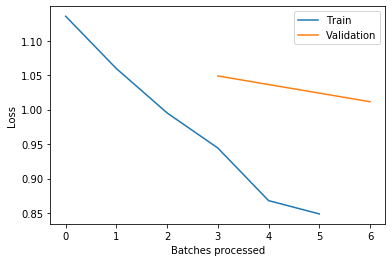

In [10]:
learn.recorder.plot_losses()
learn.show_results()